# Emotion Detection Using Hugging Face and Gradio

- This Jupyter notebook contains the code for the "Emotion Detection Using Hugging Face and Gradio" project.
- The objective of this project is to:
  - Develop an application that detects and classifies emotions in text inputs using a pre-trained model on the Emotion dataset, showcasing the capabilities of Hugging Face models and Gradio interfaces.
- The project involves several steps and each step corresponds to a separate section in this Jupyter Notebook:

1. Dataset Selection and Exploration
2. Model Selection
3. Model Fine-tuning
4. Model Evaluation
5. Upload Model to Hugging Face
6. Gradio Interface Development
7. Deployment on Hugging Face Spaces

- **Refer the [README](/readme.md) for a detailed project overview.**


# Environment Setup

- The code in this repository can be executed in 3 ways:
  - on google colab
  - using Python virtual environment
  - using VSCode DevContainers
- See below detailed steps for each option. But before that I will cover the packages that will be installed as part of the environment setup.


### Google Colab

- To run this code using Google Colab, click [this link](https://colab.research.google.com/github/kanad13/Emotion_Detection_App/blob/master/Emotion_Detection_App.ipynb).
- Once you have opened this notebook in colab, uncomment the code below and execute it.


In [1]:
# Install pandas and other packages
!pip3 install -r requirements.txt

# Install PyTorch and related packages separately (on colab)
%pip install torch torchvision torchaudio

# Comment above line when running on Apple Silicon. It is for Google Colab.
# Uncomment below line when running on Apple Silicon - https://developer.apple.com/metal/pytorch/
# !pip3 install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cpu

# Verify the installation by importing the libraries
import torch
import torchvision
import torchaudio
import accelerate

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("Torchaudio version:", torchaudio.__version__)


PyTorch version: 2.3.0+cu121
Torchvision version: 0.18.0+cu121
Torchaudio version: 2.3.0+cu121


### Python virtual environment

- All packages needed for running this code can be deployed inside a virtual environment
- These are the steps
  - First clone this repo locally
  - Then open the folder
    - `cd emotion_detection`
- Then create a Python virtual environment
  - `python -m venv emotion_detection_venv`
- Then activate the virtual environment
  - On windows - `.\emotion_detection_venv\Scripts\activate`
  - On mac - `source emotion_detection_venv/bin/activate`
  - And now install all dependencies
    - `pip install -r requirements.txt`


### VSCode DevContainers

- If you use [vscode devcontainers](https://code.visualstudio.com/docs/devcontainers/containers) like me, then you dont have to do anything noted above in the python virtual env section
- I have setup the repo nicely to be launch-ready the moment you download it
- Launch vscode, and then open the command palette (ctrl+shift+p), and then select "Remote-Containers: Open Folder in Container"
- Navigate to the cloned repository folder and bam...you are done...all requirements will be automatically installed
- You can also make modifications to these 2 files as needed
  - [devcontainer.json](.devcontainer/devcontainer.json)
  - [postStart.sh](.devcontainer/postStart.sh)


## Optional - Run Gradio locally

- I have developed the UI for the app using Gradio. To use it locally, execute the following command:

```bash
python app.py
```

- The app will be accessible at `http://localhost:7860`.
- When using Google Colab, the gradio will be rendered directly inside the Notebook; so you dont need to open it separately.


## Packages Installed

- **File location**
  - I have put all these packages in [requirements.txt](.devcontainer/requirements.txt)
- **Pandas**
  - It is the most popular data manipulation and analysis library for Python.
  - I started my Python journey with Pandas. ;) And I believe that is the case for many others.
  - It provides data structures like DataFrame and Series, and functions for reading, writing, and transforming data.
- **Matplotlib**
  - I have used this library in my code for generating plots.
  - It can also be used for plotting histograms, bar charts, and other types of graphs to visualize data.
- **IProgress**
  - Ideally this library need not be explicitly installed. But I keep on getting errors when it is not installed. So I have included it.
  - It provides interactive progress bars for Jupyter Notebooks.
- **Datasets**
  - It is a library by Hugging Face to access datasets.
  - It allows for easy dataset loading, preprocessing, and sharing.
- **Accelerate**
  - Yet another library by Hugging Face
  - It simplifies the process of training and deploying machine learning models across different hardware configurations.
- **Transformers**
  - This is another library by Hugging Face.
  - It provides pre-trained models for NLP. I have used one of them in this code viz. DistilBERT
- **Hugging Face Hub**
  - `huggingface_hub` allows interaction with the Hugging Face Hub.
  - Hugging Face Hub is a platform for sharing and collaborating on machine learning models and datasets.
  - `huggingface_hub` helps with tasks like uploading, downloading, and managing models and datasets.
- **Gradio**
  - It is an open-source Python library.
  - It allows you to quickly create customizable user interfaces for machine learning models.
  - I have created the UI for my Emotion Detection App using gradio.


# Step 1 - Dataset Selection and Exploration

- The "Emotion Detection App" involves several steps and each step corresponds to a separate section in this Jupyter Notebook:

1. Dataset Selection and Exploration - `covered in this section`
2. Model Selection
3. Model Fine-tuning
4. Model Evaluation
5. Upload Model to Hugging Face
6. Gradio Interface Development
7. Deployment on Hugging Face Spaces

- In this section, I cover the first step of the "Emotion Detection in Text Using Hugging Face and Gradio" project.
- The steps covered are
  - Use the Emotion dataset available on Hugging Face.
  - Explore the dataset to understand its structure, including the different classes of emotions (e.g., joy, anger, sadness, etc.).


## About the Emotion Dataset

- Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise.
- For more detailed information please refer to the [dataset](https://huggingface.co/datasets/dair-ai/emotion)
- The data fields are:
  - `text`: a string feature
  - `label`: a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5)
- An example looks as follows.

```json
{
	"text": "im feeling quite sad and sorry for myself but ill snap out of it soon",
	"label": 0
}
```


## Importing Emotion Dataset

- In this section I will import the dataset and explore its structure.


In [2]:
# Import dataset
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress warnings about logging to Hugging Face, since I plan to only use public datasets.
warnings.filterwarnings("ignore", message="The secret `HF_TOKEN` does not exist")
warnings.filterwarnings("ignore", message="The repository for emotion contains custom code")

# Load the Emotion dataset with trust_remote_code parameter
emotion_dataset = load_dataset("emotion", trust_remote_code=True)

# Display the dataset structure
print(emotion_dataset)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


## Exploring the Dataset

- To understand the dataset, I will now explore the different splits (train, validation, test) and the class distribution.


In [3]:
# Convert the dataset to Pandas DataFrame for easier exploration
train_df = emotion_dataset['train'].to_pandas()
validation_df = emotion_dataset['validation'].to_pandas()
test_df = emotion_dataset['test'].to_pandas()

# Display the first few rows of the training dataset
print(train_df.head())

# Display basic statistics
print(train_df.describe())

# Check the distribution of emotions in the training set
print(train_df['label'].value_counts())


                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
              label
count  16000.000000
mean       1.565937
std        1.501430
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


## Visualizing the Class Distribution

- To visualize the class distribution, we'll plot the counts of each emotion class in the training dataset.


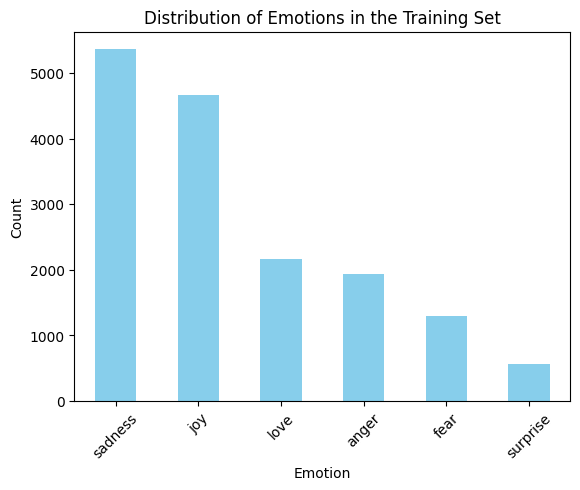

In [4]:
# Define emotion labels
emotion_labels = emotion_dataset['train'].features['label'].names

# Plot the distribution of emotions in the training set
train_df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in the Training Set')
plt.xticks(ticks=range(len(emotion_labels)), labels=emotion_labels, rotation=45)
plt.show()


## Sample Data Inspection

- To get a better understanding, let me inspect some sample data points for each emotion class.


In [5]:
# Function to print sample texts for each emotion
def print_samples(df, num_samples=2):
    for label in df['label'].unique():
        samples = df[df['label'] == label].sample(num_samples)
        emotion = emotion_labels[label]
        print(f"Emotion: {emotion}")
        for text in samples['text']:
            print(f" - {text}")

# Print sample texts
print_samples(train_df)


Emotion: sadness
 - i feel remorseful for not making the most with them
 - i still feel ashamed that i live in a world of people who dont know how
Emotion: anger
 - i sat with dave atell at first trying not to feel rude while the guys were eating
 - i feel very disgusted by that i cant tolerated her actions anymore by writing this post
Emotion: love
 - i believe is based on greed has nothing to do with how i feel about my beloved country
 - i had been lying to myself feeling that maybe because i so loved spending time with this fellow and thought he enjoyed his time so equally with me that maybe the ends justified the means
Emotion: surprise
 - i feel amazed i can compress my difficulty so neatly into one sentence
 - i stood kind of dumbfounded looking around feeling culture shocked
Emotion: fear
 - i take the offense that is most frightening to me when i am feeling the most vulnerable in close relationships with others and i draw that offense and all my frightful vulnerability into th

# Step 2 - Model Selection

- The "Emotion Detection App" involves several steps and each step corresponds to a separate section in this Jupyter Notebook:

1. Dataset Selection and Exploration - `covered in previous section`
2. Model Selection - `covered in this section`
3. Model Fine-tuning
4. Model Evaluation
5. Upload Model to Hugging Face
6. Gradio Interface Development
7. Deployment on Hugging Face Spaces


## Pre-trained Transformer Model

- In this section, I will use the transformers library to select and load a pre-trained model.
- For this task, I'll use DistilBERT, a smaller and faster version of BERT that is suitable for text classification tasks.
- See in the next sub-section, the details about:
  - What are Transformer Models?
  - Pre-trained vs. Non-Pre-trained Transformer Models
  - Major Pre-trained Transformer Models
  - Why Did We Select DistilBERT?


## What are Transformer Models?

- Transformer models are a type of neural network architecture designed for handling sequential data, such as text.
- The key innovation of transformers is the self-attention mechanism, which allows the model to weigh the importance of different words in a sentence when making predictions, enabling the handling of long-range dependencies more effectively.
- Consider the sentence: "The cat sat on the mat because it was soft." A transformer model can understand that "it" refers to "the mat" because of the self-attention mechanism, which helps the model focus on relevant parts of the sentence.


## Pre-trained vs. Non-Pre-trained Transformer Models

| Feature               | Pre-trained Transformer Models                                                  | Non-Pre-trained Transformer Models                                            |
| --------------------- | ------------------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Training Time**     | Requires less time as models are pre-trained on large datasets.                 | Requires extensive training time and computational resources.                 |
| **Performance**       | Generally achieves higher performance on specific tasks due to prior knowledge. | Performance depends heavily on the quality and quantity of the training data. |
| **Data Requirements** | Can work well with smaller labeled datasets.                                    | Requires large amounts of labeled data for training from scratch.             |
| **Use Case**          | Ideal for tasks where similar models have been successfully applied.            | Suitable for novel tasks or when custom architecture is required.             |
| **Flexibility**       | Limited to the architecture of the pre-trained model.                           | Full control over model architecture and training process.                    |


### Major Pre-trained Transformer Models

| Model          | Description                                                                                                                   |
| -------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **BERT**       | Bidirectional Encoder Representations from Transformers. Designed for understanding the context of a word in search queries.  |
| **RoBERTa**    | Robustly optimized BERT approach. Improves on BERT by training with larger mini-batches and longer sequences.                 |
| **DistilBERT** | A smaller, faster, and cheaper version of BERT. Retains 97% of BERT's language understanding capabilities.                    |
| **XLNet**      | Combines the best of BERT and autoregressive models like GPT, leading to state-of-the-art performance on many benchmarks.     |
| **T5**         | Text-To-Text Transfer Transformer. Frames all NLP tasks as text-to-text problems, enabling a unified approach.                |
| **BART**       | Bidirectional and Auto-Regressive Transformers. Combines bidirectional and autoregressive training for text generation tasks. |
| **GPT-X**      | Generative Pre-trained Transformer 3, 3.5, 4 or 4-o. Designed for generating human-like text based on input prompts.          |
| **Gemini**     | A state-of-the-art model by Google, known for its strong performance in various NLP tasks and advanced capabilities.          |


## Why Did I Select DistilBERT?

I selected DistilBERT for the following reasons:

1. **Efficiency**: DistilBERT is designed to be smaller, faster, and lighter than BERT, making it more suitable for quick iterations and deployment on less powerful hardware.
2. **Performance**: Despite its smaller size, DistilBERT retains 97% of BERT's language understanding capabilities, ensuring high performance in emotion detection tasks.
3. **Pre-training**: DistilBERT is pre-trained on large text corpora, allowing it to leverage a rich understanding of language, which is beneficial for tasks like emotion detection with limited labeled data.
4. **Community Support**: Being a part of the Hugging Face ecosystem, DistilBERT has extensive community support and pre-built functions for easy implementation.


# Step 3 - Model Fine-tuning

- The "Emotion Detection App" involves several steps and each step corresponds to a separate section in this Jupyter Notebook:

1. Dataset Selection and Exploration
2. Model Selection - `covered in previous section`
3. Model Fine-tuning - `covered in this section`
4. Model Evaluation
5. Upload Model to Hugging Face
6. Gradio Interface Development
7. Deployment on Hugging Face Spaces

- **Objective of this section**
  - Select a pre-trained transformer model suitable for text classification tasks (in our case DistilBERT)
  - Fine-tune the selected model on the Emotion dataset to enhance its performance for emotion detection.
- **Detailed Steps**
  - _Import Required Libraries_
    - Install and import the necessary libraries for handling the dataset, model selection, and fine-tuning.
  - _Load the Emotion Dataset_
    - Use the Hugging Face datasets library to load the Emotion dataset.
  - _Choose a Pre-trained Model_
    - Select a suitable transformer model from the Hugging Face model hub, such as BERT, RoBERTa, or DistilBERT.
  - _Preprocess the Data_
    - Tokenize the text data.
    - Convert the tokenized inputs into a format suitable for the model.
  - _Loading the Pre-trained Model_
    - Define the training parameters and fine-tune the model on the Emotion dataset.
  - _Defining Training Arguments_
    - Use `training_args`to specify parameters like output directory, number of epochs, batch size, warmup steps, weight decay, logging directory, and logging steps.
  - _Defining the Trainer_
    - Trainer is a high-level class from Hugging Face that simplifies the training and evaluation process.
  - _Fine-tuning the Model_
    - Use `trainer.train()`that starts the training process.
    - It automatically handles the training loop, including the forward pass, backward pass, and optimization steps.
  - _Saving the Model and Tokenizer_
    - Save the fine-tuned model & tokenizer to a local directory.
    - This ensures that the model and tokenizer can be loaded later for inference or further training.


## Choice of input parameters

- I have fine-tuned this pre-trained model on colab and also on my Apple Silicon Mac.
- Since both of them have constrained resources, I had to ensure that the fine-tuning does not consume too many resources and does not end up being executed for hours.
- So, this section explains the choices of training parameter values I made and the reason for them.


### Size of input dataset

- The Emotions Dataset originally contains 16k labelled examples.
- My Mac can not handle it. Neither can my colab (yes, I am too poor for colab premium)
- So I am using smaller subset of the dataset for faster training, only 5000.


### Training Arguments

- See below the training argument values I have set.
- I have also described the ideal values for some of them.

```python
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # number of training epochs (ideal value 3)
    per_device_train_batch_size=8,   # batch size for training (ideal value 16)
    per_device_eval_batch_size=8,    # batch size for evaluation (ideal value 16)
    warmup_steps=300,                # number of warmup steps for learning rate scheduler (ideal value 500)
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)
```


### Training Steps

- I have not directly specified the training steps in the training arguments as mentioned above.
- Instead, it is derived from a combination of factors, including the number of epochs, the size of the dataset, and the batch size
- Here is how it is calculated:

$$
\text{Total Training Steps} = \frac{\text{Number of Training Examples}}{\text{Batch Size}} \times \text{Number of Epochs}
$$

- Given the values of my Training Arguments as mentioned above

$$
\text{Total Training Steps} = \frac{1000}{8} \times 1 = 125
$$

- To summarize, the 125 training steps are a result of the number of examples from the training dataset (1000), the batch size (8), and the number of epochs (1).


In [6]:
# Step 3 - Model Fine-tuning

# Import required libraries
from datasets import load_dataset  # to load datasets from Hugging Face Hub
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments  # to use pre-trained models and training utilities
import torch  # PyTorch for tensor operations
import numpy as np  # for numerical operations

# Load the Emotion dataset from the Hugging Face Hub
emotion_dataset = load_dataset("emotion", trust_remote_code=True)

# Specify the pre-trained model name to be used (DistilBERT)
model_name = "distilbert-base-uncased"
# Load the tokenizer for the specified pre-trained model
tokenizer = AutoTokenizer.from_pretrained(model_name)# use force_download=True when needed

# Define a function to preprocess the data
def preprocess_data(examples):
    # Tokenize the input text, truncate to max length, and pad to max length
    return tokenizer(examples['text'], truncation=True, padding='max_length')

# Take a smaller subset of the training dataset for faster training
train_dataset = emotion_dataset['train'].shuffle(seed=42).select(range(10))
# Take a smaller subset of the validation dataset for faster evaluation
eval_dataset = emotion_dataset['validation'].shuffle(seed=42).select(range(10))

# Apply the preprocessing function to the training dataset
tokenized_train_dataset = train_dataset.map(preprocess_data, batched=True)
# Apply the preprocessing function to the validation dataset
tokenized_eval_dataset = eval_dataset.map(preprocess_data, batched=True)

# Prepare the dataset for PyTorch by removing the 'text' column
tokenized_train_dataset = tokenized_train_dataset.remove_columns(['text'])
tokenized_eval_dataset = tokenized_eval_dataset.remove_columns(['text'])
# Rename the 'label' column to 'labels' to match the model's expectation
tokenized_train_dataset = tokenized_train_dataset.rename_column("label", "labels")
tokenized_eval_dataset = tokenized_eval_dataset.rename_column("label", "labels")
# Set the format of the dataset to PyTorch tensors
tokenized_train_dataset.set_format('torch')
tokenized_eval_dataset.set_format('torch')

# Load the pre-trained model for sequence classification with 6 output labels (emotions)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Directory to save the model and logs
    num_train_epochs=1,              # Number of training epochs (ideal value 3)
    per_device_train_batch_size=8,   # Batch size for training (ideal value 16)
    per_device_eval_batch_size=8,    # Batch size for evaluation (ideal value 16)
    warmup_steps=50,                # Number of warmup steps for learning rate scheduler (ideal value 500)
    weight_decay=0.01,               # Strength of weight decay for regularization
    logging_dir='./logs',            # Directory to store logs
    logging_steps=10,                # Log every 10 steps
)

# Instantiate the Trainer
trainer = Trainer(
    model=model,                         # The pre-trained model to be fine-tuned
    args=training_args,                  # The training arguments
    train_dataset=tokenized_train_dataset,  # The preprocessed training dataset
    eval_dataset=tokenized_eval_dataset     # The preprocessed evaluation dataset
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model and tokenizer to disk
model.save_pretrained("emotion-detection-model")
tokenizer.save_pretrained("emotion-detection-tokenizer")


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


('emotion-detection-tokenizer/tokenizer_config.json',
 'emotion-detection-tokenizer/special_tokens_map.json',
 'emotion-detection-tokenizer/vocab.txt',
 'emotion-detection-tokenizer/added_tokens.json',
 'emotion-detection-tokenizer/tokenizer.json')

# Step 4 - Model Evaluation

- The "Emotion Detection App" involves several steps and each step corresponds to a separate section in this Jupyter Notebook:

1. Dataset Selection and Exploration
2. Model Selection
3. Model Fine-tuning - `covered in previous section`
4. Model Evaluation - `covered in this section`
5. Upload Model to Hugging Face
6. Gradio Interface Development
7. Deployment on Hugging Face Spaces


## Recap steps 1 to 3

- Let me provide some detailed comments on what has each of the 3 steps achieved earlier:

1. **Dataset Selection and Exploration**

- I am working with the Emotion dataset from Hugging Face, which contains text inputs labeled with different emotions.
  We explored the dataset to understand its structure and the distribution of different emotion classes.

2. **Model Selection**

- Then I selected a pre-trained model suitable for sequence classification tasks from Hugging Face's model hub.

3. **Model Fine-tuning**

- Then I fine-tuned the pre-trained model on our Emotion dataset to adapt it specifically for emotion detection in text.

The code in the next cell aims to evaluate the fine-tuned model on a test set to measure its performance.

I will load the saved model and tokenizer, preprocess the test data, and then use the model to make predictions.

Finally, I will calculate and display the accuracy of the model on the test set.


In [7]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define a function to compute metrics
def compute_metrics(p):
    # Unpack predictions and true labels
    predictions, labels = p
    # Get the predicted class by finding the index with the highest probability
    # The `predictions` object holds the raw predictions and true labels. We use `np.argmax` to get the predicted class with the highest probability.
    predictions = np.argmax(predictions, axis=1)
    # Calculate accuracy
    acc = accuracy_score(labels, predictions)
    # Generate a detailed classification report
    report = classification_report(labels, predictions, target_names=emotion_labels)
    return {"accuracy": acc, "report": report}


# Evaluate the model on the evaluation dataset
eval_result = trainer.evaluate()
print(f"Evaluation result: {eval_result}")

# Predict on the evaluation dataset
predictions = trainer.predict(tokenized_eval_dataset)

# Get the predicted class for each sample
preds = np.argmax(predictions.predictions, axis=1)

# Generate and print the classification report
report = classification_report(predictions.label_ids, preds, target_names=emotion_labels)
print(report)


Evaluation result: {'eval_loss': 1.7931840419769287, 'eval_runtime': 9.4857, 'eval_samples_per_second': 1.054, 'eval_steps_per_second': 0.211, 'epoch': 1.0}
              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00         1
         joy       0.00      0.00      0.00         4
        love       0.00      0.00      0.00         1
       anger       0.00      0.00      0.00         1
        fear       0.22      1.00      0.36         2
    surprise       0.00      0.00      0.00         1

    accuracy                           0.20        10
   macro avg       0.04      0.17      0.06        10
weighted avg       0.04      0.20      0.07        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Interpret evaluation metrics

- The code cell above prints evaluation metrics and the classification report.
- Here are some pointers towards understanding this report:

1. **Evaluation Loss**:

   - `eval_loss`
   - It contains the evaluation loss and other metrics, which we print to get a sense of model performance.

2. **Evaluation Runtime**:

   - `eval_runtime`
   - This is the time taken to evaluate the model.

3. **Evaluation Speed**:

   - `eval_samples_per_second`
   - `eval_steps_per_second`
   - These metrics indicate the speed of evaluation.

4. **Training Parameters**:

   - `epoch`
   - I had specified this value in Step 3.

5. **Classification Report**:
   - The classification report provides a more detailed view of the model's performance on a per-class basis.
   - `precision`, `recall`, and `f1-score` are metrics that indicate how well the model is performing for each class (sadness, joy, etc.).
   - Higher values indicate better quality of the fine-tuned model.
   - The table also lists overall accuracy. It indicates e.g. the model is correctly predicting 98% of the samples.


# Step 5 - Upload Model to Hugging Face

- The "Emotion Detection App" involves several steps and each step corresponds to a separate section in this Jupyter Notebook:

1. Dataset Selection and Exploration
2. Model Selection
3. Model Fine-tuning
4. Model Evaluation - `covered in previous section`
5. Upload Model to Hugging Face - `covered in this section`
6. Gradio Interface Development
7. Deployment on Hugging Face Spaces


## Hugging Face Token

- I will now log in to my Hugging Face account and secure a token as described [here](https://huggingface.co/docs/hub/en/security-tokens).
- This token should not be disclosed to anyone.


In [8]:
# hugging face token

from huggingface_hub import login

# Replace 'YOUR_HUGGING_FACE_TOKEN' with your actual token
login(token="YOUR_HUGGING_FACE_TOKEN")


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Hugging Face Repository

- Now I will create a repository on Hugging Face to store my model.
- Replace the repo_name value with your repository name


In [9]:
from huggingface_hub import HfApi

api = HfApi()

# Replace 'your-username' and 'new-model-repo' with your actual username and desired repository name
repo_owner = "kanad13"
repo_name = "emotion_detection"
repo_id = f"{repo_owner}/{repo_name}"

# Check if the repository exists
try:
    # Get the repository information
    repo_info = api.repo_info(repo_id)
    if repo_info:
        # If the repository exists, delete it
        api.delete_repo(repo_id)
        print(f"Repository '{repo_id}' exists and has been deleted.")
except Exception as e:
    # If the repository does not exist, an exception will be raised
    print(f"Repository '{repo_id}' does not exist. Proceeding to create a new one.")

# Create a new repository
api.create_repo(repo_id=repo_id)  # Set private=True if you want a private repository


Repository 'kanad13/emotion_detection' does not exist. Proceeding to create a new one.


RepoUrl('https://huggingface.co/kanad13/emotion_detection', endpoint='https://huggingface.co', repo_type='model', repo_id='kanad13/emotion_detection')

## Upload Model to Repo

- I am now logged into my Hugging Face account. And a new repository is also created.
- I will now push the fine-tuned model, tokenizer, and configuration files to my repository.


In [10]:
# upload model to repo

from huggingface_hub import upload_folder

# Upload the model directory
upload_folder(
    folder_path="emotion-detection-model",
    repo_id=repo_id,
    repo_type="model"
)

# Upload the tokenizer directory
upload_folder(
    folder_path="emotion-detection-tokenizer",
    repo_id=repo_id,
    repo_type="model"
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kanad13/emotion_detection/commit/8680efa65a6515fed243bb5d6c0999ba22591497', commit_message='Upload folder using huggingface_hub', commit_description='', oid='8680efa65a6515fed243bb5d6c0999ba22591497', pr_url=None, pr_revision=None, pr_num=None)

# Step 6 - Gradio Interface Development

- The "Emotion Detection App" involves several steps and each step corresponds to a separate section in this Jupyter Notebook:

1. Dataset Selection and Exploration
2. Model Selection
3. Model Fine-tuning
4. Model Evaluation
5. Upload Model to Hugging Face - `covered in previous section`
6. Gradio Interface Development - `covered in this section`
7. Deployment on Hugging Face Spaces


## Recap steps 1 to 5

- Let me provide some detailed comments on what has each of the 5 steps achieved earlier:

1. **Dataset Selection and Exploration**

- I am working with the Emotion dataset from Hugging Face, which contains text inputs labeled with different emotions.
- I explored the dataset to understand its structure and the distribution of different emotion classes.

2. **Model Selection**

- Then I selected a pre-trained model suitable for sequence classification tasks from Hugging Face's model hub.

3. **Model Fine-tuning**

- Then I fine-tuned the pre-trained model on our Emotion dataset to adapt it specifically for emotion detection in text.

4. **Model Evaluation**

   - I then evaluated the model for accuracy and precision.
   - The results were in-line with my expectations.
   - So I proceeded with uploading the model to Hugging Face

5. **Upload Model to Hugging Face**

   - In this section, I uploaded the fine-tuned and evaluated model to Hugging Face.
   - I used the Hugging Face CLI so that I dont have to leave my Jupyter Notebook to do any manual steps.

6. **Gradio Interface Development**

   - This is the step now covered in this section.
   - It involves developing a Gradio interface that will act as my UI for the model fine-tuned in previous steps.
   - It is a simple interface that has just 2 boxes - one to put in your text and another to display the emotion as inferred by the model.


In [11]:
# Step 6 - Gradio Interface Development

import gradio as gr
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the fine-tuned model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("emotion-detection-model")
tokenizer = AutoTokenizer.from_pretrained("emotion-detection-tokenizer")

# Define emotion labels
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise"]

# Define a function to classify emotions in text
def classify_emotion(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    # Get model predictions
    outputs = model(**inputs)
    # Get the predicted class with the highest probability
    predictions = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted_class = torch.argmax(predictions, dim=1).item()
    # Get the predicted emotion label
    predicted_emotion = emotion_labels[predicted_class]
    return predicted_emotion

# Link to my blog post
blog_link = "For more details about this project, visit my [blog post](https://www.kunal-pathak.com/blog/EmotionDetectionApp/)."


# Create a Gradio interface
interface = gr.Interface(
    fn=classify_emotion,  # The function to call for predictions
    inputs=gr.Textbox(lines=2, placeholder="Enter text here..."),  # Input component
    outputs=gr.Textbox(),  # Output component
    title="Emotion Detection in Text",
    description="Enter a sentence and the model will predict the emotion.",
    article=blog_link
)

# Launch the Gradio interface with public sharing enabled
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://15d9b83238b77c450d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Step 7 - Deployment on Hugging Face Spaces

- The "Emotion Detection App" involves several steps and each step corresponds to a separate section in this Jupyter Notebook:

1. Dataset Selection and Exploration
2. Model Selection
3. Model Fine-tuning
4. Model Evaluation
5. Upload Model to Hugging Face
6. Gradio Interface Development - `covered in previous section`
7. Deployment on Hugging Face Spaces - `covered in this section`


## All steps in Jupyter Notebook

- Most of the time I go directly to the Hugging Face UI and then create my space and upload the model and do all other activities.
- But I want to do the entire operation zero-touch. So the code in the next cell
  - Creates the [Hugging Face Space](https://huggingface.co/docs/hub/en/spaces-overview) using the [CLI](https://huggingface.co/docs/huggingface_hub/en/guides/cli).
  - Then clones the Space repository to my local/colab environment.
  - Copies my Gradio app script, model files, and others dependencies to the cloned repository.
  - Commits and pushes the changes to the Space repository, triggering the deployment.


In [12]:
# Step 7 - Deployment on Hugging Face Spaces

# Import Libraries and Authenticate
from huggingface_hub import HfApi, Repository, login
import os  # Import the os module here

# Authenticate with your Hugging Face token
login(token="YOUR_HUGGING_FACE_TOKEN", add_to_git_credential=True)

# Create a New Space (skip this if the space already exists)
api = HfApi()
space_name = "emotion-detection"
username = "YOUR_HF_USER_NAME"  # Replace with your Hugging Face username

try:
    # Try to create the Space
    api.create_repo(repo_id=f"{username}/{space_name}", repo_type="space", space_sdk="gradio")
except Exception as e:
    print(f"Repository already exists: {e}")

# Remove the local directory if it exists
import shutil
if os.path.exists(space_name):
    shutil.rmtree(space_name)

# Clone the Repository with Authentication
!git clone https://huggingface.co/spaces/{username}/{space_name}

# Change directory to the cloned repo
os.chdir(space_name)

# Create the Gradio app script and requirements.txt
app_code = """
import gradio as gr
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the fine-tuned model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("kanad13/emotion_detection")
tokenizer = AutoTokenizer.from_pretrained("kanad13/emotion_detection")

# Define emotion labels
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise"]

# Define a function to classify emotions in text
def classify_emotion(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    # Get model predictions
    outputs = model(**inputs)
    # Get the predicted class with the highest probability
    predictions = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted_class = torch.argmax(predictions, dim=1).item()
    # Get the predicted emotion label
    predicted_emotion = emotion_labels[predicted_class]
    return predicted_emotion

# Link to my blog post
blog_link = "For more details about this project, visit my [blog post](https://www.kunal-pathak.com/blog/EmotionDetectionApp/)."

# Create a Gradio interface
interface = gr.Interface(
    fn=classify_emotion,  # The function to call for predictions
    inputs=gr.Textbox(lines=2, placeholder="Enter text here..."),  # Input component
    outputs=gr.Textbox(),  # Output component
    title="Emotion Detection in Text",
    description="Enter a sentence and the model will predict the emotion.",
    article=blog_link
)

# Launch the Gradio interface
interface.launch()
"""

requirements_txt = """
datasets
pandas
matplotlib
transformers
IProgress
accelerate
huggingface_hub
gradio
torch
"""

# Write the Gradio app script to app.py
with open("app.py", "w") as f:
    f.write(app_code)

# Write the requirements.txt
with open("requirements.txt", "w") as f:
    f.write(requirements_txt)

# Pull the remote changes to avoid conflicts
!git pull origin main

# Push the Changes to Hugging Face Spaces
!git config --global user.email "kunalpathak13@gmail.com"
!git config --global user.name "Kunal Pathak"

!git add app.py requirements.txt
!git commit -m "Add Gradio app script and requirements"

# Pull remote changes to avoid conflicts before pushing
!git pull --rebase origin main

# Push using the token for authentication
!git remote set-url origin https://huggingface.co/spaces/{username}/{space_name}
!git push

# Navigate back to the original directory
os.chdir("..")


Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful
Cloning into 'emotion-detection'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 1.27 KiB | 1.27 MiB/s, done.
From https://huggingface.co/spaces/kanad13/emotion-detection
 * branch            main       -> FETCH_HEAD
Already up to date.
[main 3478922] Add Gradio app script and requirements
 2 files changed, 50 insertions(+)
 create mode 100644 app.py
 create mode 100644 requirements.txt
From https://huggingface.co/spaces/kanad13/emotion-detection
 * branch            main       -> FETCH_HEAD
Current branch main is up to date.
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up 